# LIBRARIES

In [1]:
import os
import glob
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# READ FILES

In [2]:
X_train = pd.read_csv('../dataset/X_train.csv', index_col=0)
y_train = pd.read_csv('../dataset/y_train.csv', index_col=0)

In [3]:
X_test = pd.read_csv('../dataset/X_test.csv', index_col=0)
y_test = pd.read_csv('../dataset/y_test.csv', index_col=0)

# READ MODELS

In [4]:
# Initialize the dictionary
models = {}

# Set the main folder path containing the model files
main_folder = '../models/'

# List all files in the main directory
files = os.listdir(main_folder)

# Iterate over the files in the directory
for file in files:
    file_path = os.path.join(main_folder, file)
    
    # Extract the model name from the file name
    model_name = os.path.splitext(file)[0]
    
    # Add the model to the dictionary with the model name
    models[model_name] = joblib.load(file_path)

# GENERALIZATION

The confusion matrix is a table that summarizes the performance of a binary classification model by showing the number of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions on the test set.

In [5]:
models['SVM']

Pipeline(steps=[('normalization', MinMaxScaler()), ('imputation', KNNImputer()),
                ('balance',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy=0.8638628715886625)),
                ('svc',
                 SVC(C=670.1482781209863, coef0=0.350931334899144, degree=4,
                     gamma=0.03051588477254697, max_iter=55446,
                     probability=True, random_state=42, shrinking=False,
                     tol=0.001781661100042244))])

In [6]:
from sklearn.metrics import classification_report

y_pred = models['SVM'].predict(X_test)

# Exiba um relatório de classificação para análise detalhada
report = classification_report(y_test, y_pred)
print("Relatório de Classificação:\n", report)

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.94      0.83      0.88       458
        True       0.46      0.73      0.57        92

    accuracy                           0.81       550
   macro avg       0.70      0.78      0.72       550
weighted avg       0.86      0.81      0.83       550



## Confusion Matrix

In [7]:
def plot_confusion_matrix(model_name):      
    
    # Select the model
    model = models[model_name]
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the heatmap
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Heatmap of Confusion Matrix - {model_name}')
    plt.show()

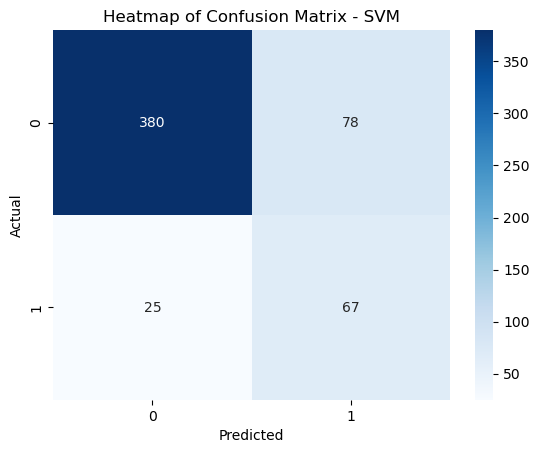

In [8]:
plot_confusion_matrix('SVM')

## ROC

In [9]:
def plot_roc_curve(model_name):
       
    model = models[model_name] 
        
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC={auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve - ' + model_name)
    plt.show()

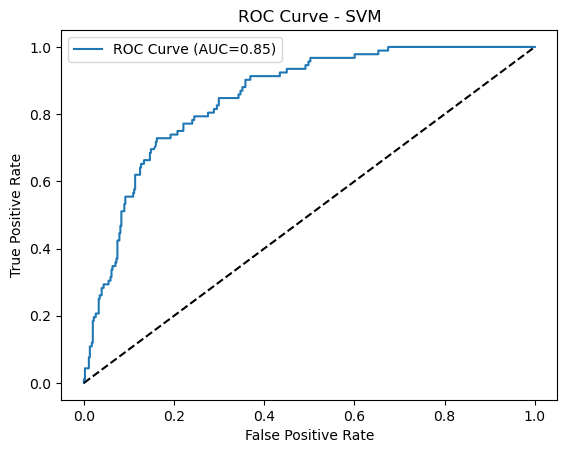

In [10]:
plot_roc_curve('SVM')